In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from grn_tpm import text_bn_graph, iit_tpm_cal

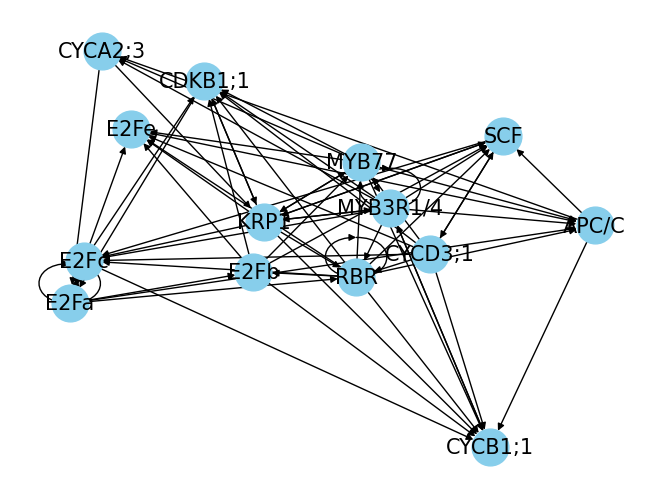

all intrinsic variables: MYB77,E2Fe,KRP1,E2Fc,MYB3R1/4,E2Fb,SCF,CDKB1;1,RBR,CYCD3;1,CYCB1;1,E2Fa,CYCA2;3,APC/C
external parameters:
mechanism:    CDKB1;1,E2Fa,RBR
tpm: 
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]
environment:    CDKB1;1,E2Fa,RBR,MYB77,KRP1,E2Fc,MYB3R1/4,E2Fb,CYCD3;1,CYCA2;3
un_en:  1.6413450977900728
un:  0.4169682113433064
syn:  0.586267007545693
------------------------------------------------------------------------------------------------------------------------


In [21]:

un, un_en, syn, tpm1, _, _, _, _ = text_bn_graph(folder = 'cellcollective/', textfile = 'Arabidopsis thaliana Cell Cycle_26340681.txt', candidate_sys=[7,11,8], fill_onenode=True, noise=0, save_onenote = False)

In [34]:
colors = ["#BB4F4F", '#2A69B3', '#74B38F', '#FFA500', "#0000FF", "#0000E0", "#1E90FF", "#87CEEB"]

def decimal_to_binary(decimal, min_length=1):
    if min_length == 0:
        return ''
    if decimal == 0:
        return "0" if min_length == 1 else "0".zfill(min_length)
    binary = ""
    while decimal > 0:
        binary = str(decimal % 2) + binary
        decimal = decimal // 2
    # 使用 zfill 确保二进制字符串至少有 min_length 长度
    return binary.zfill(min_length)

def tpm_series2(tpm, init_state, steps):
    init_num = int(init_state, 2)
    serie = [init_num]
    serie_str = [init_state]
    for t in range(steps):
        num = serie[t]
        probabilities = tpm[num, :]
        sample = np.random.choice(range(len(probabilities)), p=probabilities)
        serie.append(sample)
        serie_str.append(decimal_to_binary(sample, min_length=int(np.log2(len(probabilities)))))
    return serie, serie_str

def serie_plot2(tpm, mech_size, en_size, en_series, init='111', leg=False, figure_show=True, color="#BB4F4F"):
    un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm, mech_size=mech_size, en_size=en_size, dis=True)   
    strs = [decimal_to_binary(i, min_length=mech_size) for i in range(2**mech_size)] 

    long_serie = []

    for en_list in en_series:
        en_state = en_list[0]
        steps = len(en_list)
        serie, serie_str = tpm_series2(tpm_dic[en_state], init, steps)
        init_state = serie_str[-1]
        long_serie += serie[:-1]
        
    if figure_show:
        fig, ax = plt.subplots(figsize=(10,4), dpi=150)

            #ax.scatter(range(len(long_serie)), np.ones(len(long_serie))*indx, color='#2A69B3', alpha=1/8, s=100)
        ax.scatter(range(len(long_serie)), long_serie, label='init_state:'+init, color=color, s=100)
        ax.set_xlabel('Time')
        ax.set_ylabel('System state')
        # 设置y轴的标签
        ax.set_yticks(range(8))
        ax.set_yticklabels(strs)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        if leg:
            plt.legend(by_label.values(), by_label.keys(), loc=[1.01, 0])
        #plt.title(name + '_syn=' + str(round(syn,4)))
        # 显示图形
        plt.show()
        
    return un_sys, un_en, syn, long_serie

def generate_random_sequence(n, length):
    result = []
    while len(result) < length:
        num = random.randint(0, n)
        if num not in result:
            result.append(num)
    return result

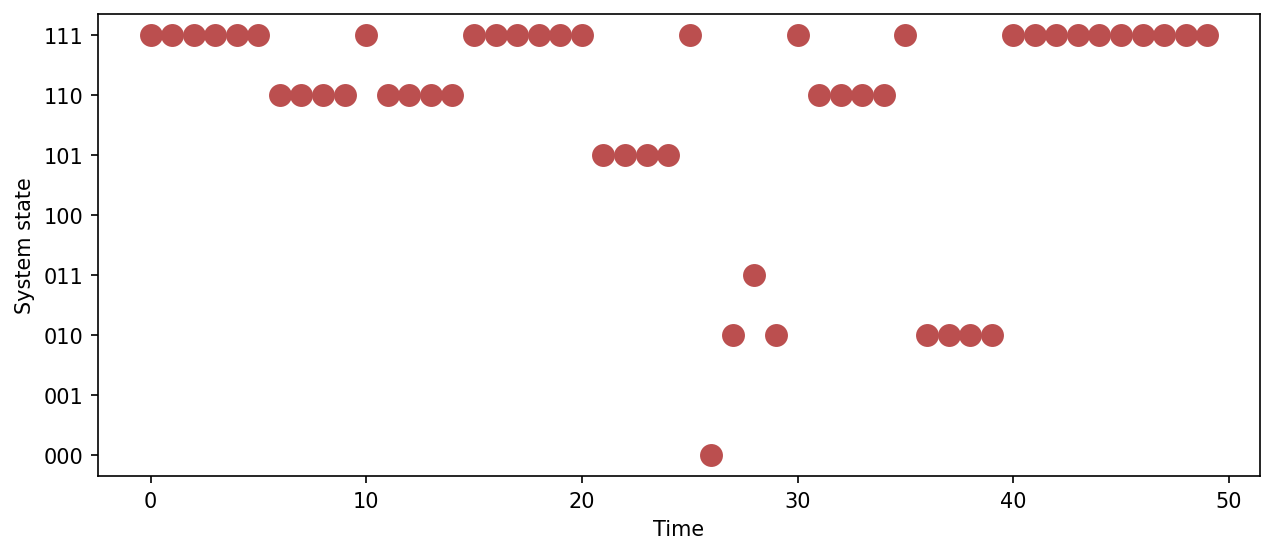

In [35]:
seed = 42
np.random.seed(seed)
random.seed(seed)
n = 5
e_len = 7
en_ls0 = generate_random_sequence(2**e_len, 10)
en_series = [[decimal_to_binary(k, min_length=e_len) for _ in range(n)] for k in en_ls0]
#en_series = [[decimal_to_binary(3, min_length=e_len) for _ in range(n)], [decimal_to_binary(11, min_length=e_len) for _ in range(n)], [decimal_to_binary(35, min_length=e_len) for _ in range(n)]]
un_sys, un_en, syn, series_ls = serie_plot2(tpm1, mech_size=3, en_size=e_len, en_series=en_series, leg=False, figure_show=True, color="#BB4F4F")

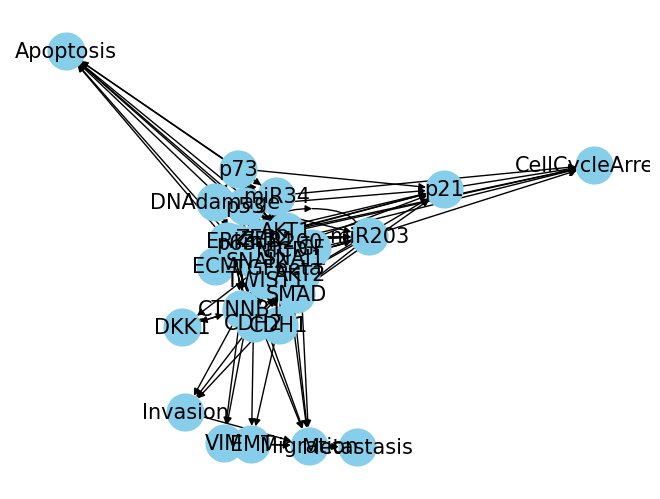

all intrinsic variables: EMT,p21,p53,p63,NICD,Invasion,AKT2,AKT1,miR200,miR34,Metastasis,SNAI1,VIM,ZEB2,ZEB1,TGFbeta,CDH2,DKK1,TWIST1,ERK,SMAD,CellCycleArrest,miR203,Apoptosis,SNAI2,GF,CDH1,Migration,p73,CTNNB1
external parameters:ECM,DNAdamage
mechanism:    AKT1,Migration,VIM
tpm: 
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
environment:    AKT1,Migration,VIM,p53,NICD,miR34,TGFbeta,CDH2,GF,CDH1,CTNNB1,EMT,p63,Invasion,AKT2,miR200,ERK,ZEB2
un_en:  1.132129764860689
un:  0.007845737427679545
syn:  0.004830483266994451
------------------------------------------------------------------------------------------------------------------------


In [27]:
un, un_en, syn, tpm2, _, _, _, _ = text_bn_graph(folder = 'cellcollective/', textfile = 'Tumour Cell Invasion and Migration_26528548.txt', candidate_sys=[7,27,12], fill_onenode=True, noise=0, save_onenote = False)

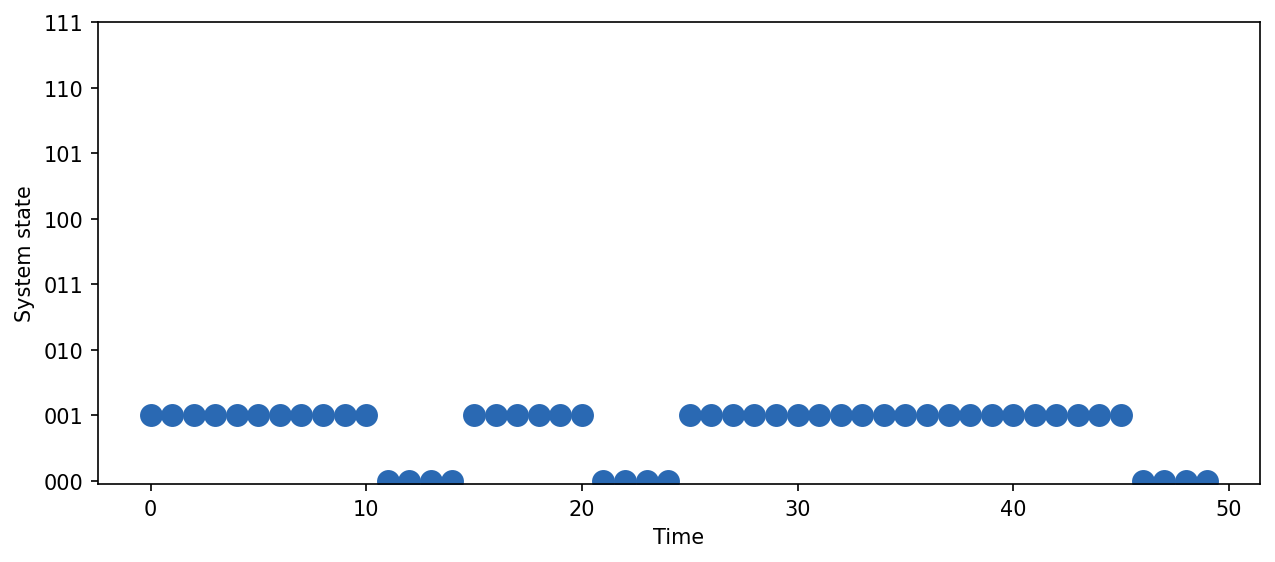

[7296, 1639, 18024, 16049, 14628, 9144, 6717, 5697, 27651, 2082]


In [37]:
import random
seed = 42
np.random.seed(seed)
random.seed(seed)
n = 5
e_len = 15

en_ls0 = generate_random_sequence(2**e_len, 10)
en_series = [[decimal_to_binary(k, min_length=e_len) for _ in range(n)] for k in en_ls0]#[decimal_to_binary(11, min_length=e_len) for _ in range(n)], [decimal_to_binary(35, min_length=e_len) for _ in range(n)]]
un_sys, un_en, syn, series_ls = serie_plot2(tpm, mech_size=3, en_size=e_len, en_series=en_series, init='001', leg=False, figure_show=True, color='#2A69B3')
print(en_ls0)